 #    ***DL Assignment*** 
# Omar Abualrub / Abdulraheem Alnatoor¶

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the data
# Load the data
train_df = pd.read_excel('C:/Users/omar/Downloads/Dataset/train.xlsx')
dev_df = pd.read_excel('C:/Users/omar/Downloads/Dataset/dev.xlsx')
test_df = pd.read_excel('C:/Users/omar/Downloads/Dataset/test.xlsx')


x_train = train_df.drop(["Loan_ID","Loan_Status"],axis=1)
y_train = train_df["Loan_Status"]

x_dev = dev_df.drop(["Loan_ID","Loan_Status"],axis=1)
y_dev = dev_df["Loan_Status"] 

x_test = test_df.drop(["Loan_ID","Loan_Status"],axis=1)
y_test = test_df["Loan_Status"]


x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [2]:
y_train.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

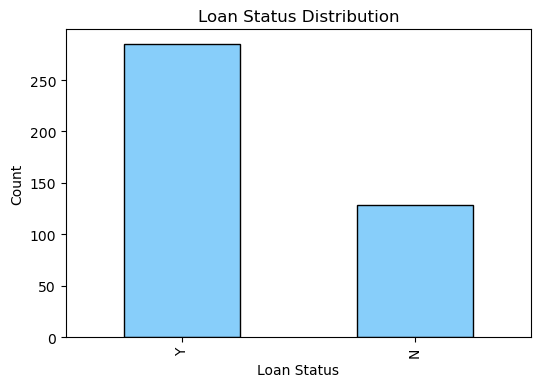

In [3]:
plt.figure(figsize=(6, 4))
train_df['Loan_Status'].value_counts().plot(kind='bar', color='lightskyblue', edgecolor='black')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Step 1: Fill Missing Values

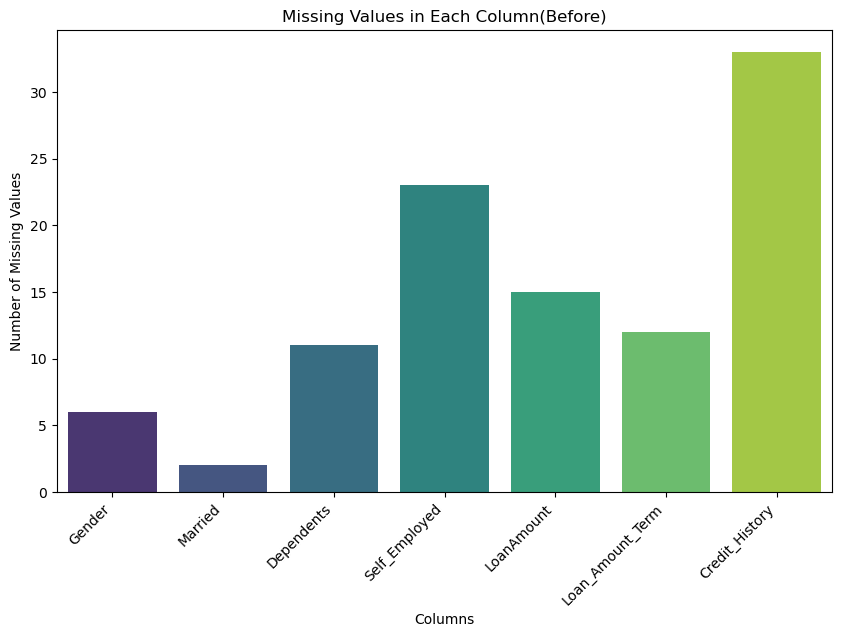

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of missing values for each column
missing_values = x_train.isnull().sum()

# Filter out columns with zero missing values (optional)
missing_values = missing_values[missing_values > 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column(Before)')
plt.show()


In [5]:
def fill_missing_values(df):
    # Fill missing numerical values with the mean for LoanAmount and Loan_Amount_Term
    for col in ['LoanAmount', 'Loan_Amount_Term']:
        df[col].fillna(df[col].mean(), inplace=True)
    
    # Fill missing categorical values with the mode
    for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    return df


x_train = fill_missing_values(x_train)
x_dev = fill_missing_values(x_dev)
x_test = fill_missing_values(x_test)

In [6]:
after = x_train.isnull().sum()
after


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [7]:
train_df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
409      Male
410    Female
411      Male
412      Male
413      Male
Name: Gender, Length: 414, dtype: object

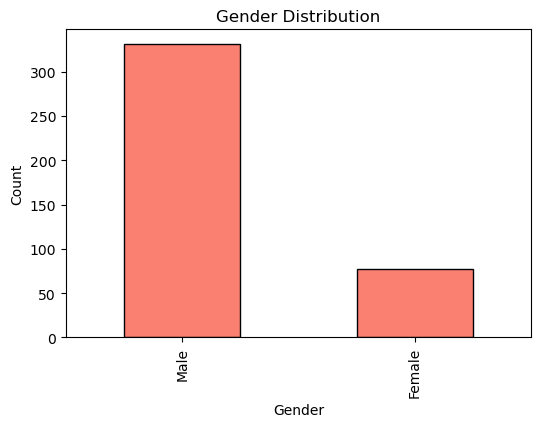

In [8]:
# Plot the count of each category in Gender
plt.figure(figsize=(6, 4))
train_df['Gender'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Step 2: Categorical Data Encoding

In [9]:


def encode_categorical(df):
    # Convert Series to DataFrame if necessary
    if isinstance(df, pd.Series):
        df = df.to_frame()
        
    categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    df_encoded = df_encoded.astype(int)
    
    # Convert back to Series if the original input was a Series
    if df_encoded.shape[1] == 1:
        return df_encoded.iloc[:, 0]
    return df_encoded



x_train = encode_categorical(x_train)
x_dev = encode_categorical(x_dev)
x_test = encode_categorical(x_test)

y_train = encode_categorical(y_train)
y_dev = encode_categorical(y_dev)
y_test = encode_categorical(y_test)

In [10]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,145,360,1,1,0,0,0,0,0,0,0,1
1,4583,1508,128,360,1,1,1,1,0,0,0,0,0,0
2,3000,0,66,360,1,1,1,0,0,0,0,1,0,1
3,2583,2358,120,360,1,1,1,0,0,0,1,0,0,1
4,6000,0,141,360,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,81000,0,360,360,0,1,1,0,0,1,0,0,0,0
410,3867,0,62,360,1,0,0,1,0,0,1,1,1,0
411,6256,0,160,360,1,1,1,0,0,0,0,0,0,1
412,6096,0,218,360,0,1,1,0,0,0,1,0,0,0


# Step 3: Feature Normalization

In [11]:
def min_max_normalize(df, min_vals=None, max_vals=None):
    if min_vals is None or max_vals is None:
        min_vals = df.min()
        max_vals = df.max()
    df_normalized = (df - min_vals) / (max_vals - min_vals)
    return df_normalized , min_vals , max_vals
    
x_train,min_vals,max_vals = min_max_normalize(x_train)
x_dev, _ , _ = min_max_normalize(x_dev, min_vals=min_vals , max_vals=max_vals)
x_test, _ , _= min_max_normalize(x_test, min_vals=min_vals , max_vals=max_vals)

# Step 4: ***logistic regression & mini batch gradient descent***

# logistic regression

In [12]:
x_train = x_train.values
x_dev = x_dev.values
x_test = x_test.values

y_train = y_train.values
y_dev = y_dev.values
y_test = y_test.values


def sigmoid (z):
  return 1 / (1 + np.exp(-z))

def predict(x, weights, bias):
    linear_model = np.dot(x, weights) + bias
    return sigmoid(linear_model).flatten()



def compute_loss(y_true, y_pred):
    loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1- y_pred + 1e-15))
    return loss

# mini batch gradient descent

In [13]:
num_samples = x_train.shape
num_samples

(414, 14)

In [14]:
def mini_batch_gradient_descent(X, y,learning_rate, num_iterations, batch_size):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    bias = 0
    
    train_accuracies = []  # Initialize to store training accuracies
    dev_accuracies = []    # Initialize to store validation accuracies
    test_accuracies = []   # Initialize to store test accuracies
    train_losses = []  # Initialize to store average training loss
    dev_losses = []
    
    for i in range(num_iterations):
        indices = np.random.permutation(num_samples)  # Shuffle the indices
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        train_loss_sum = 0.0
        
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)  # Calculate the end index for the current mini-batch
            X_batch = X_shuffled[start:end]  # Slice the shuffled feature matrix
            y_batch = y_shuffled[start:end]  # Slice the shuffled labels
            
            y_pred = predict(X_batch, weights, bias)  # Predict using the current weights and bias
            
            # Backward pass
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch))  # Gradient for weights
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch)  # Gradient for bias
            
            weights -= learning_rate * dw  # Update weights
            bias -= learning_rate * db  # Update bias
            train_loss_sum += compute_loss(y_batch, y_pred)
        
        # Compute and store accuracies
        avg_train_loss = train_loss_sum / num_samples
        train_losses.append(avg_train_loss)
        
        y_train_pred = predict(X, weights, bias)
        train_accuracy = np.mean((y_train_pred > 0.5).astype(int) == y)
        train_accuracies.append(train_accuracy)
        
        y_dev_pred = predict(x_dev, weights, bias)
        dev_accuracy = np.mean((y_dev_pred > 0.5).astype(int) == y_dev)
        dev_accuracies.append(dev_accuracy)
        
        # Calculate test accuracy after every iteration (optional)
        y_test_pred = predict(x_test, weights, bias)
        test_accuracy = np.mean((y_test_pred > 0.5).astype(int) == y_test)
        test_accuracies.append(test_accuracy)
        
        dev_loss = compute_loss(y_dev, y_dev_pred)
        dev_losses.append(dev_loss)
    
    return weights, bias, train_accuracies, dev_accuracies, test_accuracies , train_losses, dev_losses

# Q1. (20 pts)

In [15]:
learning_rates = [10000, 1000, 100, 10, 1, .01, .001, .0001, .00001]
results = []

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    try:
        weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
            x_train, y_train, learning_rate=lr, num_iterations=100, batch_size=16)

        final_train_accuracy = train_accuracies[-1]
        final_dev_accuracy = dev_accuracies[-1]
        final_test_accuracy = test_accuracies[-1]

        results.append({
            "Learning Rate": lr,
            "Train Accuracy": final_train_accuracy,
            "Dev Accuracy": final_dev_accuracy,
            "Test Accuracy": final_test_accuracy
        })
    except OverflowError:
        print(f"OverflowError with learning rate: {lr}")
        results.append({
            "Learning Rate": lr,
            "Train Accuracy": "Overflow",
            "Dev Accuracy": "Overflow",
            "Test Accuracy": "Overflow"
        })



Training with learning rate: 10000

Training with learning rate: 1000


C:\Users\omar\AppData\Local\Temp\ipykernel_17116\3406278818.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))



Training with learning rate: 100

Training with learning rate: 10

Training with learning rate: 1

Training with learning rate: 0.01

Training with learning rate: 0.001

Training with learning rate: 0.0001

Training with learning rate: 1e-05


In [16]:
results_df = pd.DataFrame(results)
print("\nResults Table:")
print(results_df)


Results Table:
   Learning Rate  Train Accuracy  Dev Accuracy  Test Accuracy
0    10000.00000        0.695652          0.65           0.57
1     1000.00000        0.765700          0.79           0.74
2      100.00000        0.792271          0.83           0.81
3       10.00000        0.763285          0.83           0.76
4        1.00000        0.797101          0.85           0.82
5        0.01000        0.785024          0.82           0.77
6        0.00100        0.688406          0.70           0.67
7        0.00010        0.688406          0.70           0.67
8        0.00001        0.688406          0.70           0.67


# Q2. (10 pts)


Training with learning rate: 0.1


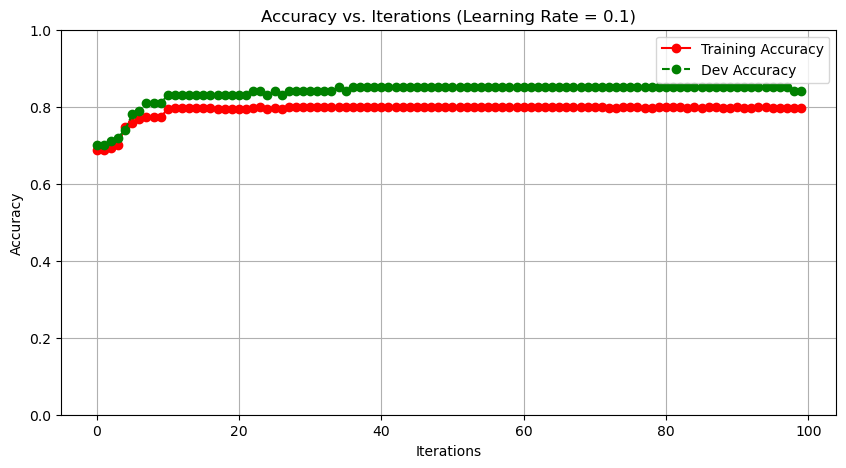


Training with learning rate: 0.001


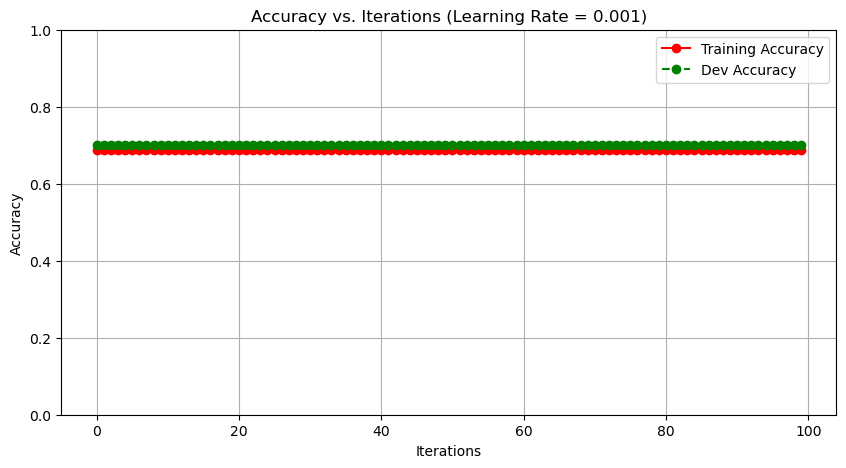


Training with learning rate: 0.0001


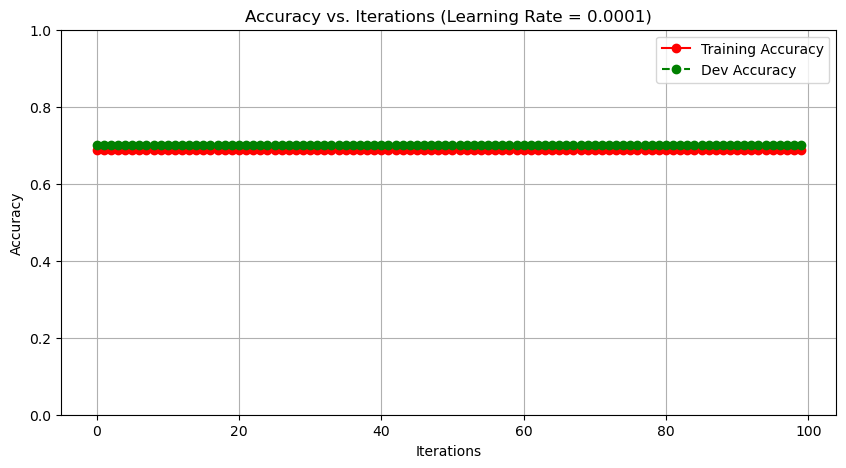

In [24]:
learning_rates = [0.1, 0.001, 0.0001]

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
        x_train, y_train,learning_rate=lr, num_iterations=100,
        batch_size=16
    )
    
    # Plot accuracy over iterations
    plt.figure(figsize=(10,5))
    plt.plot(train_accuracies, label='Training Accuracy', marker='o',color='red')
    plt.plot(dev_accuracies, label='Dev Accuracy', color='green', marker='o',linestyle='--')
    plt.title(f'Accuracy vs. Iterations (Learning Rate = {lr})') 
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.ylim(0, 1)  # Set y-limits to improve visibility
    plt.show()


# Q3. (10pts)


Training with learning rate: 100


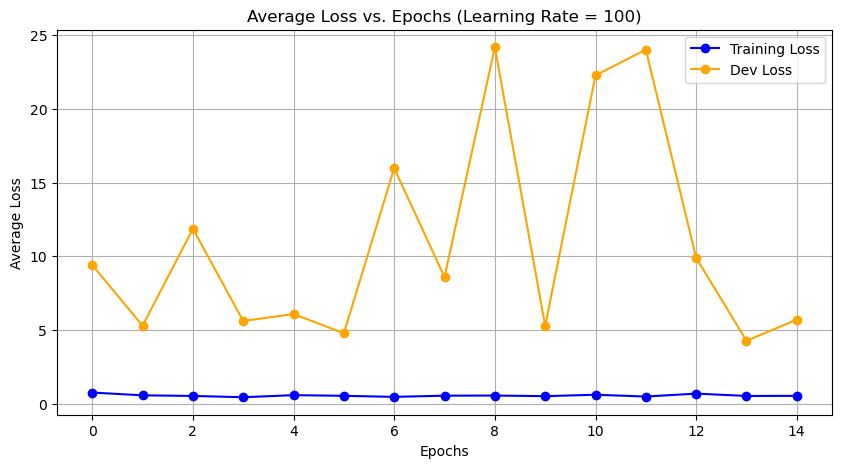


Training with learning rate: 10


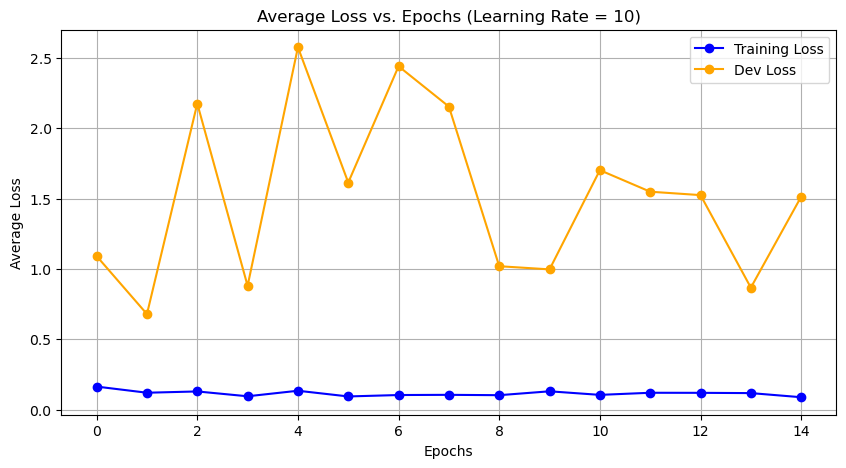


Training with learning rate: 0.1


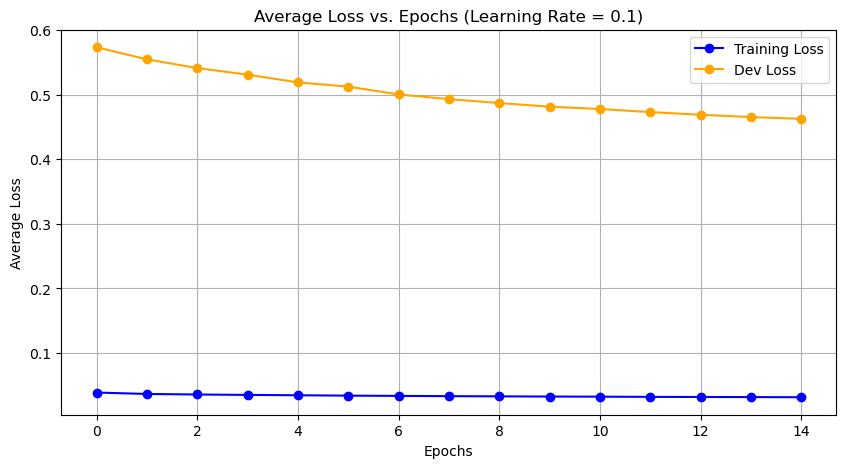

In [18]:
learning_rates = [100, 10, 0.1]

# Loop over learning rates and plot losses
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    
    weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
        x_train, y_train, learning_rate=lr, num_iterations=15, batch_size=16
    )
    
    # Plotting the average training and dev loss per epoch with dots
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='blue', marker='o', linestyle='-')
    plt.plot(dev_losses, label='Dev Loss', color='orange', marker='o', linestyle='-')
    plt.title(f'Average Loss vs. Epochs (Learning Rate = {lr})')
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.grid()
    plt.show()


# Q4. (10 pts)

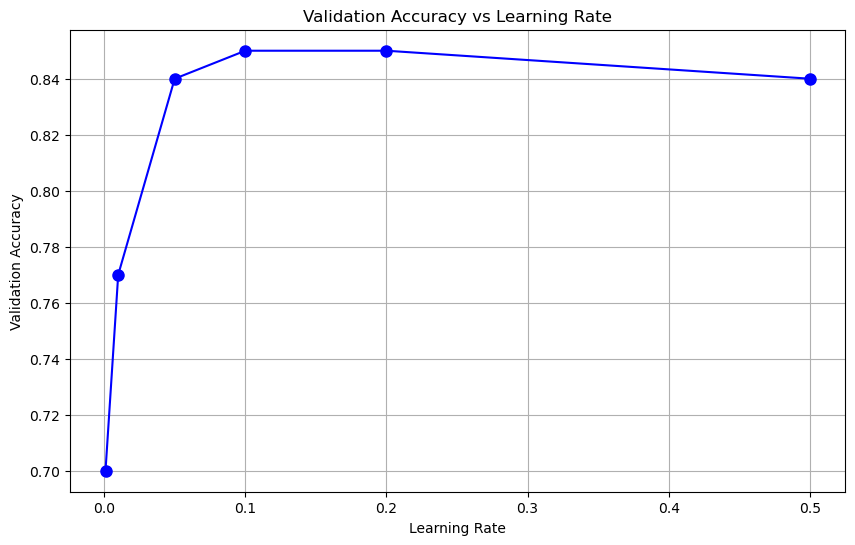

The best learning rate is: 0.1 with validation accuracy: 0.8500


In [19]:
# Define a list of learning rates to test
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]  # Adjust or add more if needed
num_iterations = 101  # Example number of iterations
batch_size = 32  # Example batch size

# Initialize an empty dictionary to store validation accuracies for each learning rate
validation_accuracies = {}

# Loop through each learning rate and run gradient descent
for lr in learning_rates:
    # Run mini-batch gradient descent
    weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
        x_train, y_train, learning_rate=lr, num_iterations=num_iterations, batch_size=batch_size
    )
    
    # Store the last recorded validation accuracy for each learning rate
    validation_accuracies[lr] = dev_accuracies[-1]  # Use the final dev accuracy for comparison

# Plot the validation accuracy as a function of learning rate
plt.figure(figsize=(10, 6))
plt.plot(list(validation_accuracies.keys()), list(validation_accuracies.values()), 'bo-', markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Learning Rate')
plt.grid(True)
plt.show()

# Identify the best learning rate
best_lr = max(validation_accuracies, key=validation_accuracies.get)
print(f"The best learning rate is: {best_lr} with validation accuracy: {validation_accuracies[best_lr]:.4f}")


# Q5

In [20]:
# Run gradient descent one more time using the best learning rate found in Q4
best_weights, best_bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
    x_train, y_train, learning_rate=best_lr, num_iterations=num_iterations, batch_size=batch_size
)

# The testing accuracy at the end of training with the best learning rate
best_test_accuracy = test_accuracies[-1]  # Last recorded test accuracy

print(f"The testing accuracy corresponding to the best learning rate ({best_lr}) is: {best_test_accuracy:.4f}")


The testing accuracy corresponding to the best learning rate (0.1) is: 0.8200


# Q6


Training with batch size: 4

Training with batch size: 8

Training with batch size: 16

Training with batch size: 32

Training with batch size: 64


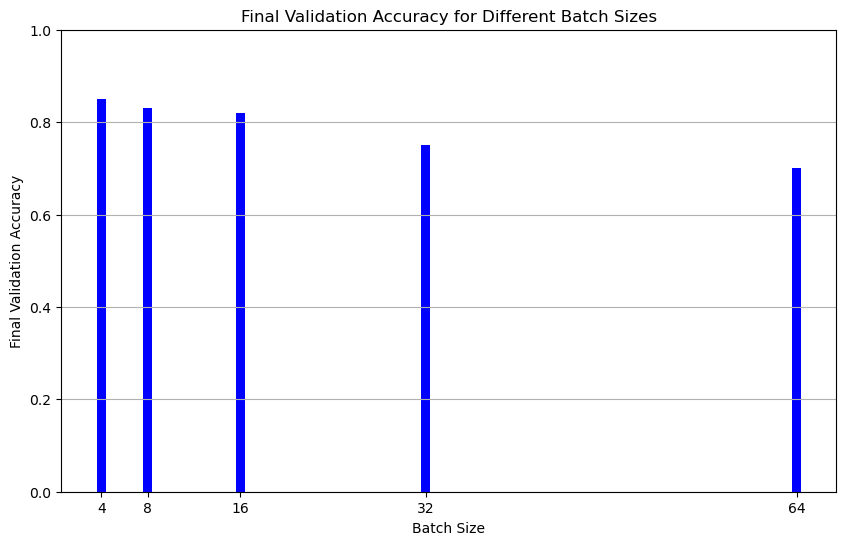

The best batch size is: 4 with validation accuracy: 0.8500


In [21]:
batch_sizes = [4, 8, 16, 32, 64]
final_dev_accuracies = {}

# Loop over different batch sizes and train the model
for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    
    # Call mini_batch_gradient_descent function
    weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
        x_train, y_train, learning_rate=0.01, num_iterations=100, batch_size=batch_size
    )
    
    # Store only the final validation accuracy for each batch size
    final_dev_accuracies[batch_size] = dev_accuracies[-1]

# Plot final validation accuracy for each batch size as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(final_dev_accuracies.keys(), final_dev_accuracies.values(), color='blue')
plt.title('Final Validation Accuracy for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Final Validation Accuracy')
plt.ylim(0, 1)
plt.xticks(batch_sizes)  # Set x-axis ticks to only show [4, 8, 16, 32, 64]
plt.grid(axis='y')
plt.show()

# Identify the best batch size
best_batch_size = max(final_dev_accuracies, key=final_dev_accuracies.get)
print(f"The best batch size is: {best_batch_size} with validation accuracy: {final_dev_accuracies[best_batch_size]:.4f}") 

# Q7


Training with lambda = 0.1

Training with lambda = 1

Training with lambda = 0.001

Training with lambda = 100


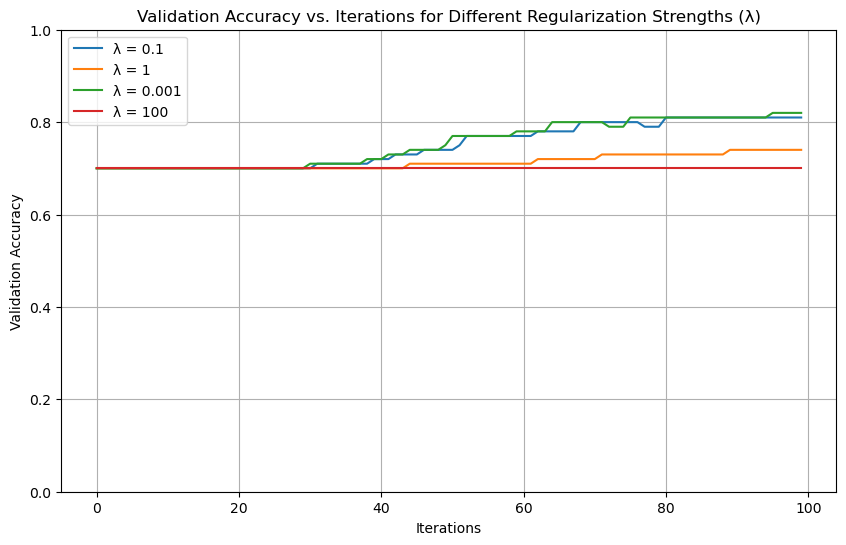

In [22]:
def compute_loss_with_regularization(y_true, y_pred, weights, lambda_val):
    # Calculate the logistic loss
    loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    
    # Add the L2 regularization term (excluding the bias term)
    regularization = (lambda_val / (2 * len(y_true))) * np.sum(weights ** 2)
    
    # Total loss with regularization
    total_loss = loss + regularization
    return total_loss

def mini_batch_gradient_descent_with_regularization(X, y,learning_rate, num_iterations, batch_size, lambda_val):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros
    bias = 0
    
    train_accuracies = []  # Initialize to store training accuracies
    dev_accuracies = []    # Initialize to store validation accuracies
    test_accuracies = []   # Initialize to store test accuracies
    
    for i in range(num_iterations):
        indices = np.random.permutation(num_samples)  # Shuffle the indices
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)  # Calculate the end index for the current mini-batch
            X_batch = X_shuffled[start:end]  # Slice the shuffled feature matrix
            y_batch = y_shuffled[start:end]  # Slice the shuffled labels
            
            y_pred = predict(X_batch, weights, bias)  # Predict using the current weights and bias
            
            # Backward pass with L2 regularization
            dw = (1 / len(y_batch)) * np.dot(X_batch.T, (y_pred - y_batch)) + (lambda_val / len(y_batch)) * weights  # Gradient for weights with regularization
            db = (1 / len(y_batch)) * np.sum(y_pred - y_batch)  # Gradient for bias (no regularization for bias)
            
            weights -= learning_rate * dw  # Update weights
            bias -= learning_rate * db  # Update bias
        
        # Compute and store accuracies
        y_train_pred = predict(X, weights, bias)
        train_accuracy = np.mean((y_train_pred > 0.5).astype(int) == y)
        train_accuracies.append(train_accuracy)
        
        y_dev_pred = predict(x_dev, weights, bias)
        dev_accuracy = np.mean((y_dev_pred > 0.5).astype(int) == y_dev)
        dev_accuracies.append(dev_accuracy)
        
        # Calculate test accuracy after every iteration (optional)
        y_test_pred = predict(x_test, weights, bias)
        test_accuracy = np.mean((y_test_pred > 0.5).astype(int) == y_test)
        test_accuracies.append(test_accuracy)
    
    return weights, bias, train_accuracies, dev_accuracies, test_accuracies

# Experimenting with different values of lambda (regularization strength)
lambda_values = [0.1, 1, 0.001, 100]
batch_size = 16  # You can use the best batch size found previously
learning_rate = 0.01  # Use the best learning rate found previously

lambda_results = {}

for lambda_val in lambda_values:
    print(f"\nTraining with lambda = {lambda_val}")
    
    weights, bias, train_accuracies, dev_accuracies, test_accuracies = mini_batch_gradient_descent_with_regularization(
        x_train, y_train,learning_rate, num_iterations=100, batch_size=batch_size, lambda_val=lambda_val
    )
    
    lambda_results[lambda_val] = {
        'train_accuracies': train_accuracies,
        'dev_accuracies': dev_accuracies,
        'test_accuracies': test_accuracies
    }

# Plotting the validation accuracy for different lambda values
plt.figure(figsize=(10, 6))
for lambda_val, accuracies in lambda_results.items():
    plt.plot(accuracies['dev_accuracies'], label=f'λ = {lambda_val}')

plt.title('Validation Accuracy vs. Iterations for Different Regularization Strengths (λ)')
plt.xlabel('Iterations')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()


# Q8


Training with learning rate: 0.1

Training with learning rate: 1

Training with learning rate: 10

Results for Learning Rate 0.1:
{'Train Accuracy': 0.7971014492753623, 'Dev Accuracy': 0.84, 'Test Accuracy': 0.82}

Results for Learning Rate 1:
{'Train Accuracy': 0.782608695652174, 'Dev Accuracy': 0.79, 'Test Accuracy': 0.77}

Results for Learning Rate 10:
{'Train Accuracy': 0.7753623188405797, 'Dev Accuracy': 0.8, 'Test Accuracy': 0.76}


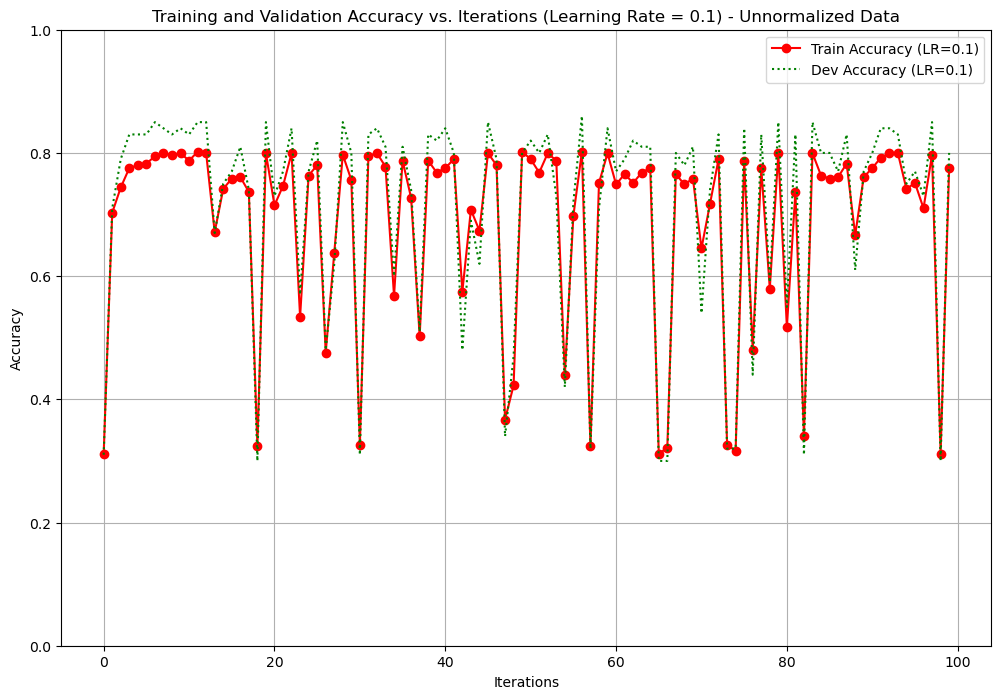

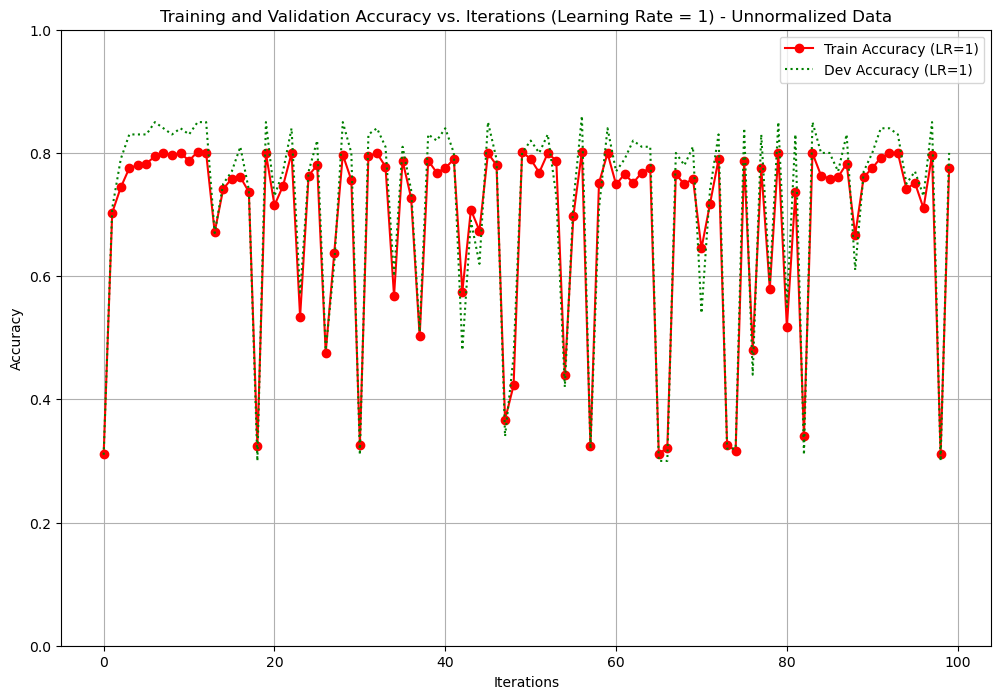

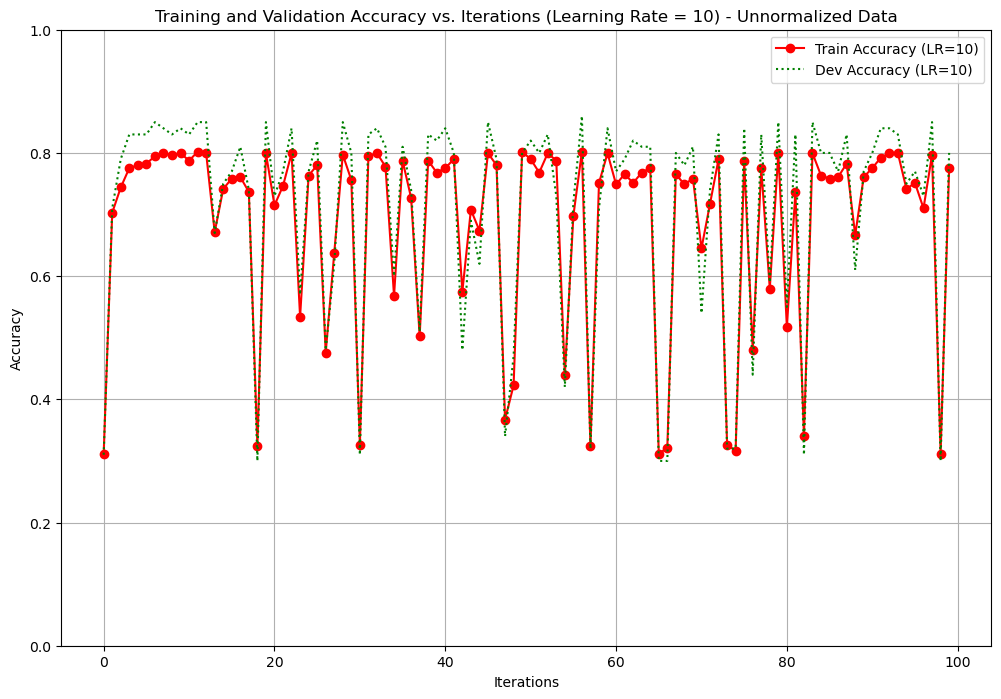

In [23]:
# Training without normalization (same data as before)
x_train_no_norm = x_train.copy()
x_dev_no_norm = x_dev.copy()
x_test_no_norm = x_test.copy()

# Select three learning rates for the experiment
learning_rates = [0.1, 1, 10]  # Example learning rates for experiment
results_no_norm = {}

# Training with different learning rates
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    try:
        # Training using mini-batch gradient descent
        weights, bias, train_accuracies, dev_accuracies, test_accuracies, train_losses, dev_losses = mini_batch_gradient_descent(
            x_train_no_norm, y_train, learning_rate=lr, num_iterations=100, batch_size=8
        )

        # Store final results for each learning rate
        final_train_accuracy = train_accuracies[-1]
        final_dev_accuracy = dev_accuracies[-1]
        final_test_accuracy = test_accuracies[-1]
        
        results_no_norm[lr] = {
            "Train Accuracy": final_train_accuracy,
            "Dev Accuracy": final_dev_accuracy,
            "Test Accuracy": final_test_accuracy
        }
        
    except OverflowError:
        print(f"OverflowError with learning rate: {lr}")
        results_no_norm[lr] = {
            "Train Accuracy": "Overflow",
            "Dev Accuracy": "Overflow",
            "Test Accuracy": "Overflow"
        }

# Display the results for each learning rate
for lr, result in results_no_norm.items():
    print(f"\nResults for Learning Rate {lr}:")
    print(result)

# Plotting training and validation accuracy for each learning rate in separate plots
for lr in learning_rates:
    plt.figure(figsize=(12, 8))
    plt.plot(train_accuracies, label=f'Train Accuracy (LR={lr})', linestyle='-',marker='o',color='red')
    plt.plot(dev_accuracies, label=f'Dev Accuracy (LR={lr})', linestyle='dotted',color='green')

    plt.title(f'Training and Validation Accuracy vs. Iterations (Learning Rate = {lr}) - Unnormalized Data')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)  # Set y-limits to improve visibility
    plt.show()
